# Lexical Forward Feature Selection (XGB)

In [14]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

The URL dataset with generated lexical features are read from a csv file. These are then displayed for visualization purposes.

In [2]:
dataset = pd.read_csv('final_unbalanced_with_lexical.csv')
dataset.head()

,url_type,url_length,url_ip_in_domain,url_domain_entropy,url_is_digits_in_domain,url_query_length,url_number_of_parameters,url_number_of_digits,url_string_entropy,url_is_https,...,has_swf_in_string,has_cgi_in_string,has_php_in_string,has_abuse_in_string,has_admin_in_string,has_bin_in_string,has_personal_in_string,has_update_in_string,has_verification_in_string,url_scheme
0,2,16,0,3.169925,0,0,0,0,3.375000,0,...,0,0,0,0,0,0,0,0,0,0
1,0,35,0,2.807355,1,0,0,1,4.079143,0,...,0,0,0,0,0,0,0,0,0,0
2,0,31,0,2.921928,0,0,0,1,3.708093,0,...,0,0,0,0,0,0,0,0,0,0
3,1,88,0,2.896292,0,49,4,7,4.660343,0,...,0,0,1,0,0,0,0,0,0,27
4,1,235,0,3.405822,0,194,3,22,4.980518,0,...,0,0,1,0,0,0,0,0,0,27


In [3]:
features = dataset.iloc[:, 1:]
url_type = dataset.iloc[:, 0]

In [4]:
features.head()

,url_length,url_ip_in_domain,url_domain_entropy,url_is_digits_in_domain,url_query_length,url_number_of_parameters,url_number_of_digits,url_string_entropy,url_is_https,url_path_length,...,has_swf_in_string,has_cgi_in_string,has_php_in_string,has_abuse_in_string,has_admin_in_string,has_bin_in_string,has_personal_in_string,has_update_in_string,has_verification_in_string,url_scheme
0,16,0,3.169925,0,0,0,0,3.375000,0,16,...,0,0,0,0,0,0,0,0,0,0
1,35,0,2.807355,1,0,0,1,4.079143,0,35,...,0,0,0,0,0,0,0,0,0,0
2,31,0,2.921928,0,0,0,1,3.708093,0,31,...,0,0,0,0,0,0,0,0,0,0
3,88,0,2.896292,0,49,4,7,4.660343,0,10,...,0,0,1,0,0,0,0,0,0,27
4,235,0,3.405822,0,194,3,22,4.980518,0,10,...,0,0,1,0,0,0,0,0,0,27


In [5]:
url_type.head()

0    2
1    0
2    0
3    1
4    1
Name: url_type, dtype: int64

A forward feature selection algorithm is then ran on the dataset using XGB with a scoring that's dependent on accuracy and a cross validatoin of 5.

In [7]:
forward_feature_selection = SequentialFeatureSelector(XGBClassifier(), k_features = 76, forward = True,
                                                      floating = False, verbose = 10, scoring = 'accuracy', n_jobs = 8).fit(features, url_type)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  5.3min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed: 11.1min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed: 17.6min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 22.5min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed: 25.2min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed: 30.6min
[Parallel(n_jobs=8)]: Done  69 out of  76 | elapsed: 36.3min remaining:  3.7min
[Parallel(n_jobs=8)]: Done  76 out of  76 | elapsed: 36.6min finished

[2024-03-10 01:59:38] Features: 1/76 -- score: 0.7760076196938901[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  5.4min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed: 13.8min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed: 15.1min
[Parallel(n_jobs=8)]: Do

Once all iterations have finished, the results of each iteration are displayed.

In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(75,)","[0.7749775541310838, 0.7757605495583906, 0.7774703763637313, 0.775664248055541, 0.7761653703607037]",0.776008,"(url_scheme,)",0.001061,0.000825,0.000413
2,"(9, 75)","[0.8276783663583405, 0.8270624099555258, 0.8288771728349951, 0.8275512867359189, 0.8278122879365245]",0.827796,"(url_path_length, url_scheme)",0.000767,0.000597,0.000298
3,"(9, 23, 75)","[0.8722986657757918, 0.871181592299501, 0.8728506551130135, 0.8727149344886986, 0.8719841311270032]",0.872206,"(url_path_length, url_num_forward_slash, url_scheme)",0.000767,0.000597,0.000298
4,"(9, 18, 23, 75)","[0.90126949658614, 0.8990771093896812, 0.9016234274677664, 0.8994623375267526, 0.9012997859790155]",0.900546,"(url_path_length, url_number_of_letters, url_num_forward_slash, url_scheme)",0.001358,0.001057,0.000528
5,"(9, 18, 19, 23, 75)","[0.9180360386695342, 0.9170024847054893, 0.9178159419533329, 0.9167719371509109, 0.9171999791199039]",0.917365,"(url_path_length, url_number_of_letters, url_num_periods, url_num_forward_slash, url_scheme)",0.00062,0.000482,0.000241
6,"(2, 9, 18, 19, 23, 75)","[0.9312843212995636, 0.9315348798363018, 0.9309704024638513, 0.9304484000626403, 0.9304275199665919]",0.930933,"(url_domain_entropy, url_path_length, url_number_of_letters, url_num_periods, url_num_forward_slash, url_scheme)",0.000568,0.000442,0.000221
7,"(2, 6, 9, 18, 19, 23, 75)","[0.9360553734366192, 0.9363998914246341, 0.9359085451793078, 0.935584903690557, 0.9350315811452733]",0.935796,"(url_domain_entropy, url_number_of_digits, url_path_length, url_number_of_letters, url_num_periods, url_num_forward_slash, url_scheme)",0.000596,0.000463,0.000232
8,"(2, 6, 9, 12, 18, 19, 23, 75)","[0.938540078925939, 0.9384252395966007, 0.9380174348802004, 0.9379339144960067, 0.9385811974735084]",0.9383,"(url_domain_entropy, url_number_of_digits, url_path_length, get_tld, url_number_of_letters, url_num_periods, url_num_forward_slash, url_scheme)",0.000348,0.000271,0.000135
9,"(2, 6, 9, 12, 18, 19, 23, 68, 75)","[0.9408890652078592, 0.941024784415259, 0.9410972490473456, 0.9401054444850446, 0.9405856866941588]",0.94074,"(url_domain_entropy, url_number_of_digits, url_path_length, get_tld, url_number_of_letters, url_num_periods, url_num_forward_slash, has_php_in_string, url_scheme)",0.000466,0.000363,0.000181
10,"(2, 6, 9, 12, 14, 18, 19, 23, 68, 75)","[0.9422566972208882, 0.9424654960015033, 0.9426319361069061, 0.9423709349063005, 0.9421621339458162]",0.942377,"(url_domain_entropy, url_number_of_digits, url_path_length, get_tld, url_num_subdomain, url_number_of_letters, url_num_periods, url_num_forward_slash, has_php_in_string, url_scheme)",0.00021,0.000163,0.000082


The program then looks for when the accuracy plateaus. For this implementation, a plateau is when the accuracy does not increase by more than 0.1%.

In [11]:
all_iterations = pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
all_iterations_series = pd.Series(all_iterations['avg_score'])
all_iterations_list = all_iterations_series.to_list()

prev = all_iterations_list[0]
for accuracy in all_iterations_list[1:]:
    if accuracy > prev*1.001:
        prev = accuracy
        pass
    else:
        print('Plateus at: ', all_iterations_list.index(prev))

Plateus at:  12
Plateus at:  14
Plateus at:  14
Plateus at:  17
Plateus at:  17
Plateus at:  17
Plateus at:  17
Plateus at:  17
Plateus at:  17
Plateus at:  17
Plateus at:  17
Plateus at:  17
Plateus at:  17
Plateus at:  17
Plateus at:  17
Plateus at:  17
Plateus at:  17
Plateus at:  17
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33
Plateus at:  33


The features from the longest occuring plateau are extracted and is considered as the final featureset.

In [19]:
all_iterations.at[all_iterations.index[33], 'feature_names']

('url_length',
 'url_domain_entropy',
 'url_is_digits_in_domain',
 'url_number_of_parameters',
 'url_number_of_digits',
 'url_string_entropy',
 'url_path_length',
 'url_host_length',
 'get_tld',
 'url_domain_len',
 'url_num_subdomain',
 'url_number_of_fragments',
 'url_is_encoded',
 'url_number_of_letters',
 'url_num_periods',
 'url_num_of_hyphens',
 'url_num_underscore',
 'url_num_forward_slash',
 'url_num_semicolon',
 'url_num_mod_sign',
 'has_login_in_string',
 'has_signin_in_string',
 'has_logon_in_string',
 'has_loginasp_in_string',
 'has_exe_in_string',
 'has_viewerphp_in_string',
 'has_getImageasp_in_string',
 'has_paypal_in_string',
 'has_dbsysphp_in_string',
 'has_shopping_in_string',
 'has_php_in_string',
 'has_bin_in_string',
 'has_personal_in_string',
 'url_scheme')

The accuracy with respect to the number of features are graphed for better visualization.

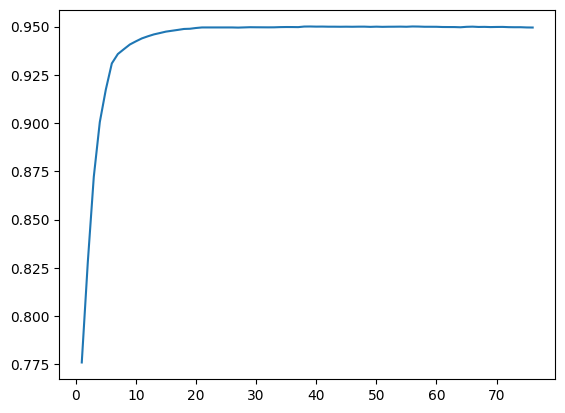

In [20]:
y_points = np.array(list(all_iterations['avg_score']))
x_points = np.array([i for i in range(1, len(y_points) + 1)])

plt.plot(x_points, y_points)

The results of the forward feature selection is saved for easier referencing.

In [17]:
all_iterations.to_csv('lexical_ffs_xgb_results.csv', encoding='utf-8', index=False)